# 1. Preparo ambiente

In [1]:
from binance.client import Client
from datetime import datetime
from backtesting import Backtest, Strategy
from backtesting.lib import plot_heatmaps

import multiprocessing
import pandas as pd
import numpy as np

multiprocessing.set_start_method('fork', force=True)

#TODO: mover a variables de entorno
api_key = ''
secret_key = ''

client = Client(api_key, secret_key)

/Users/nelsonrios/opt/anaconda3/lib/python3.8/site-packages/backtesting/_plotting.py:45: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [1]:
%%time
bars = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1MINUTE, "6 week ago UTC")

def cast_string_to_float(data):
    if type(data) == str:
        casted_data = float(data)
    else:
        casted_data = datetime.fromtimestamp(data/1000.0)
    return casted_data

# delete unwanted data - just keep date, open, high, low, close
formated_bars = []
for line in bars:
    del line[6:]
    # cast string numbers to integer
    formated_bars.append(list(map(cast_string_to_float, line)))

#  store data in a dataframe
btc_df = pd.DataFrame(formated_bars, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
btc_df.set_index('Date', inplace=True)
# Converting the index as date
btc_df.index = pd.to_datetime(btc_df.index)
btc_df

NameError: name 'client' is not defined

# 2. Agrego predictores

In [1]:
from talib import *
import numpy as np



In [18]:
%%time
data = btc_df.copy()

# Percentage changes
data['PctChange_1'] = data['Close'].pct_change()
data['PctChange_5'] = data['Close'].pct_change(periods=5)
data['PctChange_10'] = data['Close'].pct_change(periods=10)
data['PctChange_12'] = data['Close'].pct_change(periods=12)
data['PctChange_15'] = data['Close'].pct_change(periods=15)
data['PctChange_30'] = data['Close'].pct_change(periods=30)
data['PctChange_30'] = data['Close'].pct_change(periods=50)
data['PctChange_60'] = data['Close'].pct_change(periods=60)
data['PctChange_100'] = data['Close'].pct_change(periods=100)
data['PctChange_200'] = data['Close'].pct_change(periods=200)
data['PctChange_500'] = data['Close'].pct_change(periods=500)
data['PctChange_900'] = data['Close'].pct_change(periods=900)

# Distance from moving averages
data['Sma_5'] = (data['Close'] - data['Close'].rolling(5).mean()) / data['Close']
data['Sma_10'] = (data['Close'] - data['Close'].rolling(10).mean()) / data['Close']
data['Sma_12'] = (data['Close'] - data['Close'].rolling(12).mean()) / data['Close']
data['Sma_15'] = (data['Close'] - data['Close'].rolling(15).mean()) / data['Close']
data['Sma_30'] = (data['Close'] - data['Close'].rolling(30).mean()) / data['Close']
data['Sma_50'] = (data['Close'] - data['Close'].rolling(50).mean()) / data['Close']
data['Sma_60'] = (data['Close'] - data['Close'].rolling(60).mean()) / data['Close']
data['Sma_100'] = (data['Close'] - data['Close'].rolling(60).mean()) / data['Close']
data['Sma_200'] = (data['Close'] - data['Close'].rolling(200).mean()) / data['Close']
data['Sma_500'] = (data['Close'] - data['Close'].rolling(500).mean()) / data['Close']
data['Sma_900'] = (data['Close'] - data['Close'].rolling(900).mean()) / data['Close']

# Moving averages velocity (percentage change)
data['Sma_5_pctc'] = data['Sma_5'].pct_change(periods=5)
data['Sma_10_pctc'] = data['Sma_10'].pct_change(periods=10)
data['Sma_12_pctc'] = data['Sma_12'].pct_change(periods=12)
data['Sma_15_pctc'] = data['Sma_15'].pct_change(periods=15)
data['Sma_30_pctc'] = data['Sma_30'].pct_change(periods=30)
data['Sma_50_pctc'] = data['Sma_50'].pct_change(periods=50)
data['Sma_60_pctc'] = data['Sma_60'].pct_change(periods=60)
data['Sma_100_pctc'] = data['Sma_100'].pct_change(periods=100)

# Momentum indicators
data['Apo_12_26'] = APO(data['Close'], fastperiod=12, slowperiod=26) / data['Close']
data['Apo_5_10'] = APO(data['Close'], fastperiod=5, slowperiod=10) / data['Close']
data['Apo_10_20'] = APO(data['Close'], fastperiod=10, slowperiod=20) / data['Close']
data['Apo_15_30'] = APO(data['Close'], fastperiod=15, slowperiod=30) / data['Close']
data['Apo_20_50'] = APO(data['Close'], fastperiod=20, slowperiod=50) / data['Close']
data['Apo_50_100'] = APO(data['Close'], fastperiod=50, slowperiod=100) / data['Close']
data['Apo_50_200'] = APO(data['Close'], fastperiod=50, slowperiod=200) / data['Close']
data['Apo_100_200'] = APO(data['Close'], fastperiod=100, slowperiod=200) / data['Close']

data['aroonosc_14'] = AROONOSC(data['High'], data['Low'], timeperiod=14)
data['aroonosc_5'] = AROONOSC(data['High'], data['Low'], timeperiod=5)
data['aroonosc_10'] = AROONOSC(data['High'], data['Low'], timeperiod=10)
data['aroonosc_12'] = AROONOSC(data['High'], data['Low'], timeperiod=12)
data['aroonosc_30'] = AROONOSC(data['High'], data['Low'], timeperiod=30)
data['aroonosc_50'] = AROONOSC(data['High'], data['Low'], timeperiod=50)
data['aroonosc_60'] = AROONOSC(data['High'], data['Low'], timeperiod=60)
data['aroonosc_100'] = AROONOSC(data['High'], data['Low'], timeperiod=100)
data['aroonosc_200'] = AROONOSC(data['High'], data['Low'], timeperiod=200)
data['aroonosc_500'] = AROONOSC(data['High'], data['Low'], timeperiod=500)
data['aroonosc_900'] = AROONOSC(data['High'], data['Low'], timeperiod=900)

data['bop_1'] = BOP(data['Open'], data['High'], data['Low'], data['Close'])
data['bop_3'] = data['bop_1'].rolling(3).mean()
data['bop_5'] = data['bop_1'].rolling(5).mean()
data['bop_10'] = data['bop_1'].rolling(10).mean()
data['bop_20'] = data['bop_1'].rolling(20).mean()

data['cci_14'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=14)
data['cci_5'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=5)
data['cci_30'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=30)
data['cci_50'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=50)
data['cci_100'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=100)
data['cci_200'] = CCI(data['High'], data['Low'], data['Close'], timeperiod=200)

data['mfi_14'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=14)
data['mfi_5'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=5)
data['mfi_30'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=30)
data['mfi_50'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=50)
data['mfi_60'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=60)
data['mfi_100'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=100)
data['mfi_200'] = MFI(data['High'], data['Low'], data['Close'], data['Volume'], timeperiod=200)

data['rsi_14'] = RSI(data['Close'], timeperiod=14)
data['rsi_5'] = RSI(data['Close'], timeperiod=5)
data['rsi_10'] = RSI(data['Close'], timeperiod=10)
data['rsi_12'] = RSI(data['Close'], timeperiod=12)
data['rsi_30'] = RSI(data['Close'], timeperiod=30)
data['rsi_50'] = RSI(data['Close'], timeperiod=50)
data['rsi_60'] = RSI(data['Close'], timeperiod=60)
data['rsi_100'] = RSI(data['Close'], timeperiod=100)
data['rsi_200'] = RSI(data['Close'], timeperiod=200)
data['rsi_500'] = RSI(data['Close'], timeperiod=500)
data['rsi_900'] = RSI(data['Close'], timeperiod=900)

# Volume indicator
data['obv_1'] = OBV(data['Close'], data['Volume'])
data['obv_3'] = data['obv_1'].rolling(3).mean()
data['obv_5'] = data['obv_1'].rolling(5).mean()
data['obv_10'] = data['obv_1'].rolling(10).mean()
data['obv_20'] = data['obv_1'].rolling(20).mean()

# Volatility indicators
data['std_dev_chg_3'] = data['PctChange_1'].rolling(3).std()
data['std_dev_chg_5'] = data['PctChange_1'].rolling(5).std()
data['std_dev_chg_10'] = data['PctChange_1'].rolling(10).std()
data['std_dev_chg_20'] = data['PctChange_1'].rolling(20).std()


data['std_dev_5'] = data['Close'].rolling(5).std()
data['std_dev_10'] = data['Close'].rolling(10).std()
data['std_dev_20'] = data['Close'].rolling(20).std()
data['std_dev_30'] = data['Close'].rolling(30).std()
data['std_dev_50'] = data['Close'].rolling(50).std()
data['std_dev_100'] = data['Close'].rolling(100).std()
data['std_dev_200'] = data['Close'].rolling(200).std()
data['std_dev_500'] = data['Close'].rolling(500).std()
data['std_dev_900'] = data['Close'].rolling(900).std()

data['coef_var_3'] = data['Close'].rolling(3).std() / data['Close'].rolling(3).mean()
data['coef_var_5'] = data['Close'].rolling(5).std() / data['Close'].rolling(5).mean()
data['coef_var_10'] = data['Close'].rolling(10).std() / data['Close'].rolling(10).mean()
data['coef_var_20'] = data['Close'].rolling(20).std() / data['Close'].rolling(20).mean()
data['coef_var_30'] = data['Close'].rolling(30).std() / data['Close'].rolling(30).mean()
data['coef_var_50'] = data['Close'].rolling(50).std() / data['Close'].rolling(50).mean()
data['coef_var_100'] = data['Close'].rolling(100).std() / data['Close'].rolling(100).mean()
data['coef_var_200'] = data['Close'].rolling(200).std() / data['Close'].rolling(200).mean()

data['kurtosis_5'] = data['PctChange_1'].rolling(5).kurt()
data['kurtosis_10'] = data['PctChange_1'].rolling(10).kurt()
data['kurtosis_20'] = data['PctChange_1'].rolling(20).kurt()
data['kurtosis_30'] = data['PctChange_1'].rolling(30).kurt()
data['kurtosis_50'] = data['PctChange_1'].rolling(50).kurt()
data['kurtosis_100'] = data['PctChange_1'].rolling(100).kurt()
data['kurtosis_200'] = data['PctChange_1'].rolling(200).kurt()
data['kurtosis_500'] = data['PctChange_1'].rolling(500).kurt()
data['kurtosis_900'] = data['PctChange_1'].rolling(900).kurt()

data['skewness_5'] = data['PctChange_1'].rolling(5).skew()
data['skewness_10'] = data['PctChange_1'].rolling(10).skew()
data['skewness_20'] = data['PctChange_1'].rolling(20).skew()
data['skewness_30'] = data['PctChange_1'].rolling(30).skew()
data['skewness_50'] = data['PctChange_1'].rolling(50).skew()
data['skewness_100'] = data['PctChange_1'].rolling(100).skew()
data['skewness_200'] = data['PctChange_1'].rolling(200).skew()
data['skewness_500'] = data['PctChange_1'].rolling(500).skew()
data['skewness_900'] = data['PctChange_1'].rolling(900).skew()

data['natr_14'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=14)
data['natr_3'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=3)
data['natr_5'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=5)
data['natr_10'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=10)
data['natr_20'] = NATR(data['High'], data['Low'], data['Close'], timeperiod=20)


data['previous_candle_green'] = np.where(data.shift(1)['PctChange_1'] >= 0, 1, 0)
data['greens_in_3'] = data['previous_candle_green'].rolling(3).sum()
data['greens_in_5'] = data['previous_candle_green'].rolling(5).sum()
data['greens_in_10'] = data['previous_candle_green'].rolling(10).sum()
data['greens_in_15'] = data['previous_candle_green'].rolling(15).sum()
data['greens_in_20'] = data['previous_candle_green'].rolling(20).sum()
data['greens_in_30'] = data['previous_candle_green'].rolling(30).sum()

data['previous_candle_red'] = np.where(data.shift(1)['PctChange_1'] < 0, 1, 0)
data['reds_in_3'] = data['previous_candle_red'].rolling(3).sum()
data['reds_in_5'] = data['previous_candle_red'].rolling(5).sum()
data['reds_in_10'] = data['previous_candle_red'].rolling(10).sum()
data['reds_in_15'] = data['previous_candle_red'].rolling(15).sum()
data['reds_in_20'] = data['previous_candle_red'].rolling(20).sum()
data['reds_in_30'] = data['previous_candle_red'].rolling(30).sum()

data['distance_std_dev_20'] = abs(data['Close'] - data['Close'].rolling(20).mean())/data['std_dev_20']
data['distance_std_dev_50'] = abs(data['Close'] - data['Close'].rolling(50).mean())/data['std_dev_50']
data['distance_std_dev_200'] = abs(data['Close'] - data['Close'].rolling(200).mean())/data['std_dev_200']


data.dropna(inplace=True)

CPU times: user 855 ms, sys: 294 ms, total: 1.15 s
Wall time: 1.23 s


In [19]:
print('Number of predictors:', data.shape[1] - 5)

Number of predictors: 144


# 3. Agrego lo que vamos a quere predecir

In [20]:
data_full = data.copy()

In [22]:
data = data_full.copy()
data.dropna(inplace=True)
prediction_period = 5

data['forward'] = data['Close'].shift(-prediction_period)/data['Close'] - 1
data['target'] = 0
data.loc[data['forward'] >= 0, 'target'] = 1

data.drop(data.tail(prediction_period).index,inplace=True) # drop last prediction_period rows (since we don't have the forward values for these)

In [23]:
# Reparto resultados

ONE_WEEK = 10080
ONE_DAY = 1440

time_frame = ONE_WEEK

results_train = list(data['target'][:-time_frame])
results_test = list(data['target'][-time_frame:])

print('Cantidad de datos de entrenamiento: ', len(results_train))
print('Proporcion de resultados positivos:', round(sum(results_train)/len(results_train) * 100, 2), '%')

Cantidad de datos de entrenamiento:  49497
Proporcion de resultados positivos: 49.67 %


In [24]:
# Aislo indicadores
indicators = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'forward', 'target'])

indicators

,PctChange_1,PctChange_5,PctChange_10,PctChange_12,PctChange_15,PctChange_30,PctChange_60,PctChange_100,PctChange_200,PctChange_500,...,previous_candle_red,reds_in_3,reds_in_5,reds_in_10,reds_in_15,reds_in_20,reds_in_30,distance_std_dev_20,distance_std_dev_50,distance_std_dev_200
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-25 05:58:00,-0.000562,0.001394,-0.000036,-0.003414,-0.002980,-0.014349,-0.021279,-0.023445,0.002100,-0.035736,...,0,1.0,2.0,6.0,8.0,13.0,17.0,0.518061,1.188239,1.674193
2021-05-25 05:59:00,0.000512,-0.000277,0.001689,0.000220,-0.000966,-0.014277,-0.021726,-0.022043,0.001470,-0.038339,...,1,2.0,2.0,6.0,9.0,13.0,18.0,0.138157,1.060306,1.610158
2021-05-25 06:00:00,0.000510,-0.000447,0.001501,0.000986,-0.002216,-0.015885,-0.019831,-0.021630,0.002536,-0.038457,...,0,1.0,2.0,5.0,8.0,12.0,18.0,0.249546,0.941229,1.548752
2021-05-25 06:01:00,0.000500,0.003056,0.002287,0.002700,-0.001898,-0.017578,-0.021985,-0.019875,-0.000293,-0.036815,...,0,1.0,2.0,5.0,8.0,11.0,18.0,0.629506,0.831640,1.481705
2021-05-25 06:02:00,0.000001,0.000960,0.002369,0.002002,0.001231,-0.015213,-0.023581,-0.018879,-0.002150,-0.038059,...,0,0.0,1.0,4.0,8.0,10.0,18.0,0.600356,0.804165,1.477256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-05 14:50:00,0.001230,0.003351,-0.000147,-0.000269,-0.001944,-0.007163,-0.008663,-0.008837,-0.006135,-0.028304,...,0,1.0,2.0,4.0,8.0,12.0,17.0,0.043653,1.009600,2.479536
2021-07-05 14:51:00,0.000818,0.004578,0.000052,0.000671,0.000370,-0.006169,-0.007450,-0.008219,-0.006562,-0.027480,...,0,1.0,2.0,4.0,7.0,12.0,17.0,0.391827,0.791967,2.163690
2021-07-05 14:52:00,0.003155,0.006762,0.003748,0.003828,0.003504,-0.003108,-0.004364,-0.005344,-0.002765,-0.024120,...,0,0.0,1.0,4.0,6.0,11.0,16.0,1.477433,0.058119,1.093079


# 4. Preparo el modelo

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = 'entropy', max_depth=100, n_jobs=-1)

# Reviso proporcion de resultados
results_train = list(data['target'][:-time_frame])
results_test = list(data['target'][-time_frame:])

indicators_train = indicators.iloc[:-time_frame]
indicators_test = indicators.iloc[-time_frame:]

print('Cantidad de datos de entrenamiento: ', len(results_train))
print('Proporcion de resultados positivos:', round(sum(results_train)/len(results_train) * 100, 2), '%')

Cantidad de datos de entrenamiento:  49497
Proporcion de resultados positivos: 49.67 %


In [26]:
%%time
model.fit(indicators_train, results_train)

CPU times: user 2min 50s, sys: 1.03 s, total: 2min 51s
Wall time: 1min 3s


RandomForestClassifier(criterion='entropy', max_depth=100, n_jobs=-1)

# 5. Evaluo predicciones

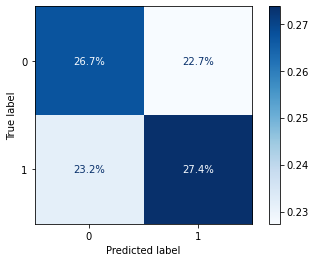

In [27]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

results_predicted = model.predict(indicators_test)
matrix = np.array(confusion_matrix(results_test, results_predicted, normalize='all'))

plot_confusion_matrix(model, indicators_test, results_test, values_format='.1%', normalize='all', cmap='Blues')

In [28]:
print('Accuracy:', round(accuracy_score(results_test, results_predicted)*100, 2), '%')

Accuracy: 54.11 %


In [29]:
#len(model.feature_importances_)
#len(indicators.columns)
a = model.feature_importances_.copy()

estimator_importances = pd.DataFrame(data = model.feature_importances_, index = indicators.columns)

In [31]:
estimator_importances.sort_values(0).tail(50).sort_index()

,0
Apo_100_200,0.008332
Apo_10_20,0.008066
Apo_15_30,0.008348
Apo_20_50,0.008262
Apo_50_100,0.008502
PctChange_200,0.007920
PctChange_500,0.008696
PctChange_900,0.008533
Sma_100_pctc,0.008054
Sma_500,0.007809


In [47]:
r= model.predict_proba(indicators_test)

backtest = pd.DataFrame(data=r, columns=['Down prob', 'Up prob'])
backtest['Actual'] = results_test
backtest['Correct'] = 0
backtest['Predicted'] = 0
prob_threshold = 0.7

backtest.loc[(backtest['Down prob'] > prob_threshold) & (backtest['Actual'] == 0), 'Correct'] = 1
backtest.loc[(backtest['Up prob'] >= prob_threshold) & (backtest['Actual'] == 1), 'Correct'] = 1
backtest.loc[(backtest['Down prob'] >= prob_threshold) | (backtest['Up prob'] >= prob_threshold), 'Predicted'] = 1

print('Accuracy: ', backtest['Correct'].sum()/backtest['Predicted'].sum())
print('Predicted: ', backtest['Predicted'].sum()/len(backtest))
print('Total predictions:', backtest['Predicted'].sum())

Accuracy:  0.5391304347826087
Predicted:  0.011408730158730158
Total predictions: 115


In [2]:
backtest.hist(column='Up prob', bins=100)

NameError: name 'backtest' is not defined